<a href="https://colab.research.google.com/github/Shukals/Deep-Learning/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 784).astype('float32')  # Flatten the images
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256
EPOCHS = 50
NOISE_DIM = 100
NUM_EXAMPLES_TO_GENERATE = 16

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Generator model
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(256, use_bias=False, input_shape=(NOISE_DIM,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(512, use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(1024, use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(784, use_bias=False, activation='tanh')  # Output shape (None, 784)
    ])
    return model

# Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Dense(1024, input_shape=(784,)),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(512),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(256),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(1)  # Output shape (None, 1)
    ])
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Loss functions
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)  # Real labels are 1
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)  # Fake labels are 0
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

seed = tf.random.normal([NUM_EXAMPLES_TO_GENERATE, NOISE_DIM])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    predictions = predictions.numpy().reshape(-1, 28, 28)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow((predictions[i] * 127.5 + 127.5).astype(np.uint8), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Training loop
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        # Produce images for the GIF as we go
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs}')
            generate_and_save_images(generator, epoch + 1, seed)

train(train_dataset, EPOCHS)


KeyboardInterrupt: 

Epoch 10/50


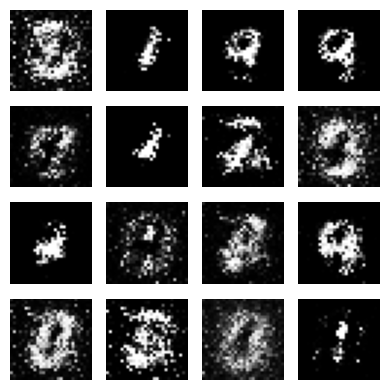

Epoch 20/50


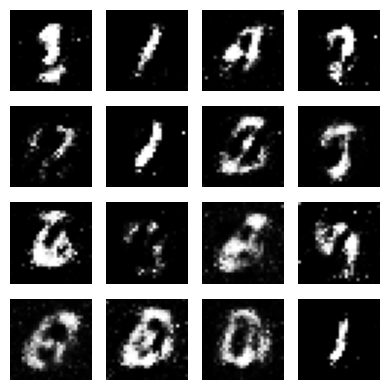

Epoch 30/50


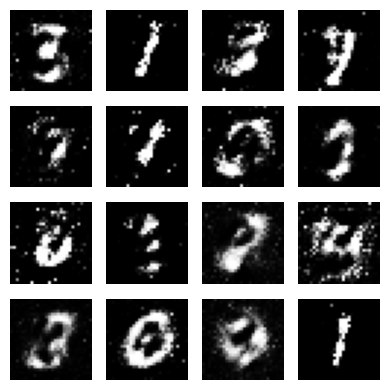

Epoch 40/50


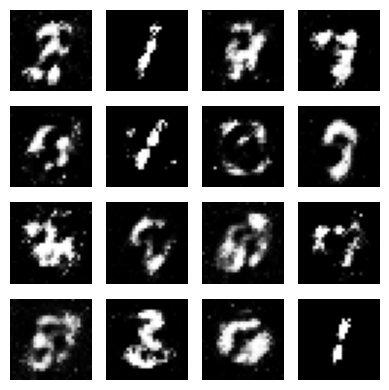

Epoch 50/50


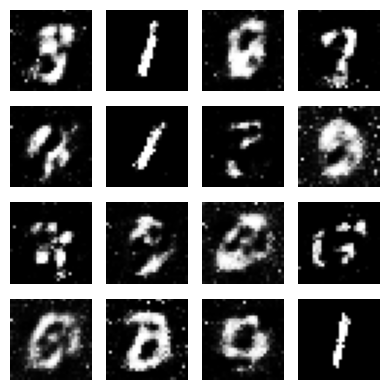

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 784).astype('float32')  # Flatten the images
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256
EPOCHS = 50
NOISE_DIM = 100
NUM_EXAMPLES_TO_GENERATE = 16

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Generator model
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(256, use_bias=False, input_shape=(NOISE_DIM,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(512, use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(1024, use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(784, use_bias=False, activation='tanh')  # Output shape (None, 784)
    ])
    return model

# Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Dense(1024, input_shape=(784,)),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(512),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(256),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(1)  # Output shape (None, 1)
    ])
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Loss functions
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)  # Real labels are 1
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)  # Fake labels are 0
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

seed = tf.random.normal([NUM_EXAMPLES_TO_GENERATE, NOISE_DIM])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    predictions = predictions.numpy().reshape(-1, 28, 28)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow((predictions[i] * 127.5 + 127.5).astype(np.uint8), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Training loop
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        # Produce images for the GIF as we go
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{epochs}')
            generate_and_save_images(generator, epoch + 1, seed)

train(train_dataset, EPOCHS)
